# **Uber Eats USA Restaurants Analysis**

# Introduction
As college students who began their undergraduate studies in the midst of a pandemic, we witnessed the rise of many new businesses and services. During the pandemic, people were encouraged to stay indoors and avoid public gatherings, so naturally, services which allowed consumers to obtain what they needed without leaving the comfort of their homes rose in popularity. Uber Eats is a service which falls into this category. It allows people to order food from their home by simply using their smartphone to choose a restaurant, enter their address, and pay the fee for the food and delivery. A Uber Eats driver will drive to the store, pick up the food, and deliver it to the front door of the customer. The consumer can enjoy a full meal without having to cook or leave their home, which people considered the safer option during the Covid 19 outbreak. 

Today, as society works towards a post-pandemic world, we still see the resilience of services like UberEats. People still prefer the convenience of not having to leave their homes for food. Now, the motivation could be anything from not having transportation options to simply not wanting to make a meal after a long day. The service of having food delivered to your doorstep will most likely be in demand for a while. 

For our final 320 project, we decided to explore and analyze Uber Eats data to determine many different relationships different components of restaurants have with each other and the consumers that choose to give them their business. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/restaurants.csv')

df

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700
...,...,...,...,...,...,...,...,...,...,...,...
40222,40223,54,Mangia la pasta! (5610 N Interstate Hwy 35),4.8,500.0,"Pasta, Comfort Food, Italian, Group Friendly",$,"5610 N I35, Austin, TX, 78751",78751,30.316248,-97.708441
40223,40224,53,Wholly Cow Burgers (S Lamar),4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821
40224,40225,52,EurAsia Ramen 3,4.7,293.0,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",$,"5222 Burnet Road, Austin, TX, 78756",78756,30.324290,-97.740200
40225,40226,51,Austin's Habibi (5th St),4.7,208.0,"Mediterranean, Gluten Free Friendly, Allergy F...",$$,"817 W 5th St, Austin, TX, 78703",78703,30.269580,-97.753110


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/restaurant-menus.csv')

df2.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [ ]:
df.count()

id                    40227
position              40227
name                  40227
rating                22254
number_of_ratings     22254
category              40227
price_range           33581
full_address          39949
zip_code              39940
lat                   40227
lng                   40227
State                 38526
price_range_number    33581
gen_category          40227
dtype: int64

In [ ]:
# rename the columns so that the column names are more clear
df.rename(columns={'score': 'rating', 'ratings': 'number_of_ratings'}, inplace=True)
df.head()

,id,position,name,rating,number_of_ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [ ]:
lst = []
for a in df["full_address"]:
    result = re.search('^(([^,]+,){2}) ([A-Z]{2}), ([0-9]{5})', str(a))
    if result:
      lst.append(result.group(3))
    else:
      lst.append(None)
df["State"] = lst
df["State"].unique()

array(['AL', None, 'WY', 'WI', 'MN', 'IL', 'WV', 'OH', 'WA', 'OR', 'ID',
       'VA', 'DC', 'MD', 'TN', 'VT', 'UT', 'PR', 'TX'], dtype=object)

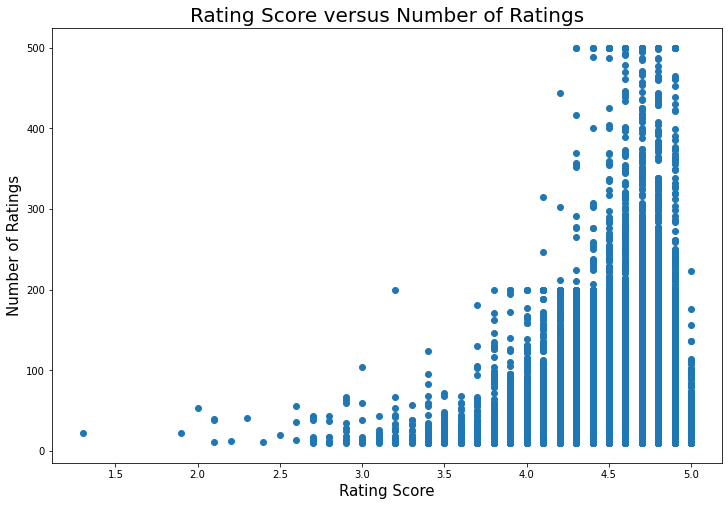

In [ ]:
# set size of plot
plt.figure(figsize=(12, 8))

font1 = {'size':20}
font2 = {'size':15}

#set the title
plt.title("Rating Score versus Number of Ratings", fontdict = font1)

# naming the x and y axis
plt.xlabel('Rating Score', fontdict = font2)
plt.ylabel('Number of Ratings', fontdict = font2)

# plot the scatter of rating vs number of ratings
plt.scatter(df.rating, df.number_of_ratings)

In [ ]:
# Look at price range
df['price_range'].unique()
df['price_range'].value_counts()

$       24385
$$       9029
$$$       149
$$$$       18
Name: price_range, dtype: int64

In [ ]:
prices = df.groupby('price_range')

prices['rating'].count()

low = prices.get_group('$')
med = prices.get_group('$$')
high = prices.get_group('$$$')
top = prices.get_group('$$$$')

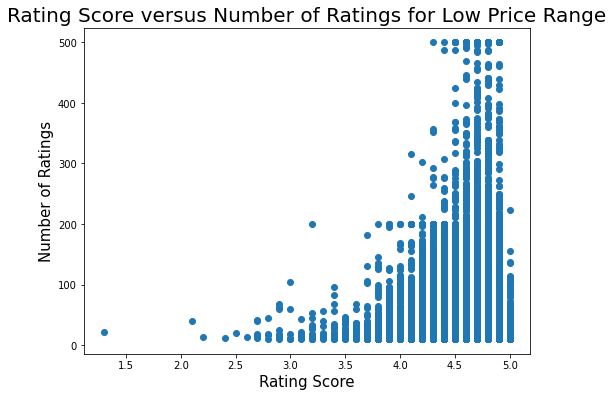

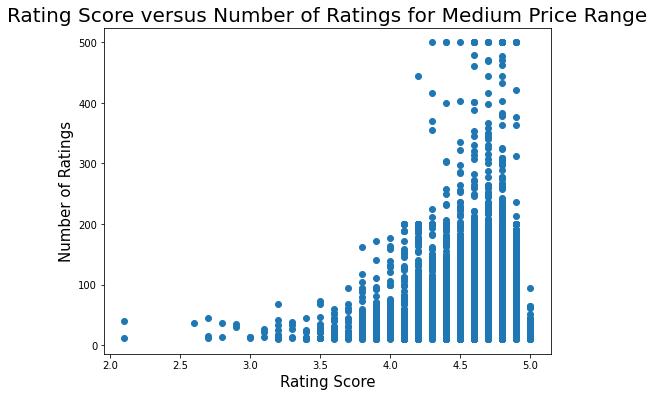

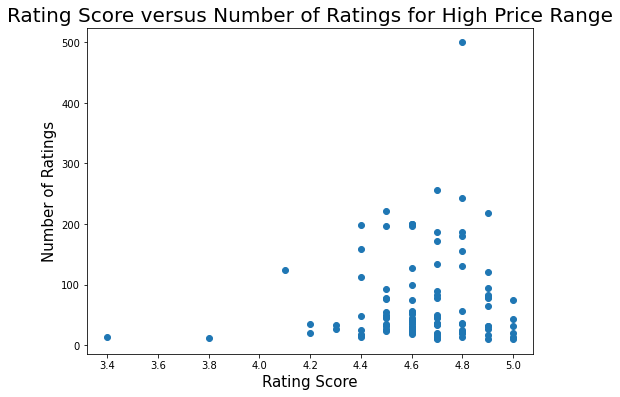

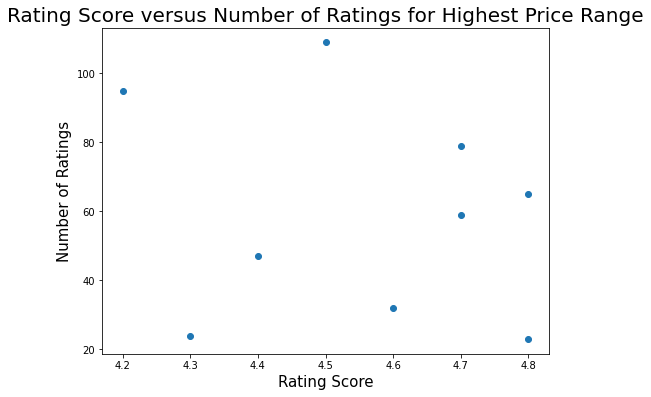

In [ ]:
#low plot
# set size of plot
plt.figure(figsize=(8, 6))

font1 = {'size':20}
font2 = {'size':15}

#set the title
plt.title("Rating Score versus Number of Ratings for Low Price Range", fontdict = font1)

# naming the x and y axis
plt.xlabel('Rating Score', fontdict = font2)
plt.ylabel('Number of Ratings', fontdict = font2)

# plot the scatter of rating vs number of ratings
plt.scatter(low.rating, low.number_of_ratings)



### Medium plot
# set size of plot
plt.figure(figsize=(8, 6))

font1 = {'size':20}
font2 = {'size':15}

#set the title
plt.title("Rating Score versus Number of Ratings for Medium Price Range", fontdict = font1)

# naming the x and y axis
plt.xlabel('Rating Score', fontdict = font2)
plt.ylabel('Number of Ratings', fontdict = font2)

# plot the scatter of rating vs number of ratings
plt.scatter(med.rating, med.number_of_ratings)


### High plot
# set size of plot
plt.figure(figsize=(8, 6))

font1 = {'size':20}
font2 = {'size':15}

#set the title
plt.title("Rating Score versus Number of Ratings for High Price Range", fontdict = font1)

# naming the x and y axis
plt.xlabel('Rating Score', fontdict = font2)
plt.ylabel('Number of Ratings', fontdict = font2)

# plot the scatter of rating vs number of ratings
plt.scatter(high.rating, high.number_of_ratings)


### Top plot
# set size of plot
plt.figure(figsize=(8, 6))

font1 = {'size':20}
font2 = {'size':15}

#set the title
plt.title("Rating Score versus Number of Ratings for Highest Price Range", fontdict = font1)

# naming the x and y axis
plt.xlabel('Rating Score', fontdict = font2)
plt.ylabel('Number of Ratings', fontdict = font2)

# plot the scatter of rating vs number of ratings
plt.scatter(top.rating, top.number_of_ratings)




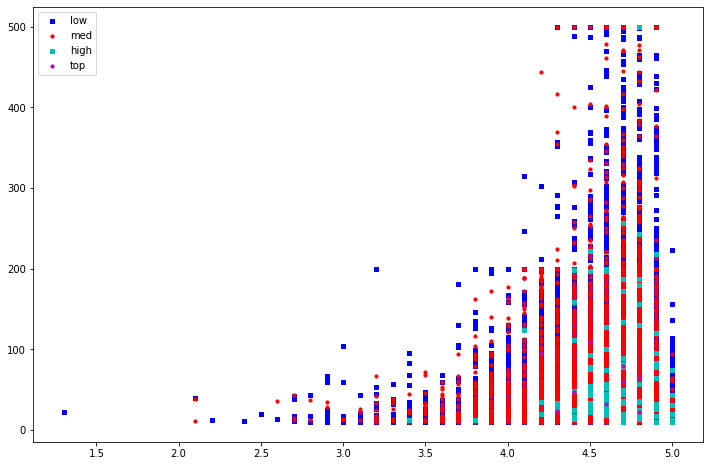

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

ax1.scatter(low.rating, low.number_of_ratings, s=10, c='b', marker="s", label='low')
ax1.scatter(med.rating, med.number_of_ratings, s=10, c='r', marker="o", label='med')
ax1.scatter(high.rating, high.number_of_ratings, s=10, c='c', marker="s", label='high')
ax1.scatter(top.rating, top.number_of_ratings, s=10, c='m', marker="o", label='top')
plt.legend(loc='upper left')
plt.show()

In [ ]:
df['price_range_number'] = df['price_range'].apply(lambda x: 0 if x =='$' else 1 if x == '$$' else 2 if x == '$$$' else 3 if x == '$$$$' else np.nan)

Text(0.5, 1.0, 'Average Rating by Price Category')

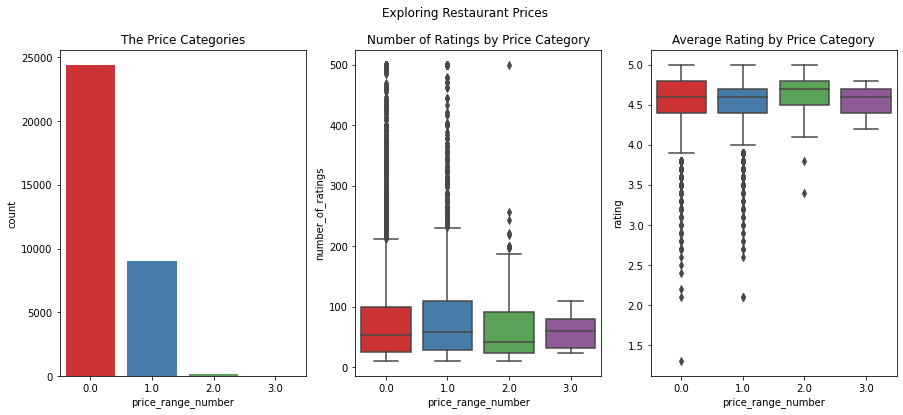

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15, 6))
fig.suptitle('Exploring Restaurant Prices')

sns.countplot(ax=axes[0], data=df, x='price_range_number', palette="Set1").set_title('The Price Categories')

sns.boxplot(ax=axes[1], data=df, x='price_range_number', y = 'number_of_ratings', palette="Set1").set_title('Number of Ratings by Price Category')

sns.boxplot(ax=axes[2], data=df, x='price_range_number', y = 'rating', palette="Set1").set_title('Average Rating by Price Category')

Now we change directions to find the best restaurants in all the dataset

In [ ]:
# try to find the best rated retaurants by rating and number of ratings
highly_rated_restaurant = df.sort_values(['rating','number_of_ratings'], ascending=False)
highly_rated_restaurant.head(20)

,id,position,name,rating,number_of_ratings,category,price_range,full_address,zip_code,lat,lng,State,price_range_number
18401,18402,68,Starbucks (S. Van Dorn and Pickett),5.0,223.0,"Cafe, Coffee &amp; Tea, Breakfast and Brunch, ...",$,"5782 Dow Ave, Alexandria, VA, 22304",22304,38.804558,-77.132929,VA,0.0
28607,28608,169,Sundevich,5.0,176.0,"Salads, American, Vegetarian, Sandwich",NaN,"601 New Jersey Ave. NW, Washington, DC, 20001",20001,38.897830,-77.011590,DC,NaN
23134,23135,35,Berries &amp; Bowls,5.0,156.0,"Juice and Smoothies, Healthy, Vegetarian",$,"120 Market St, Gaithersburg, MD, 20878",20878,39.122270,-77.234758,MD,0.0
22901,22902,15,Starbucks (South Riding Blvd),5.0,137.0,"Cafe, Coffee &amp; Tea, Breakfast and Brunch, ...",$,"43114 Peacock Market #140, South Riding, VA, 2...",20152,38.915668,-77.511693,VA,0.0
19926,19927,86,Open Road (ROSSLYN),5.0,136.0,"Burgers, American, Sandwiches",$,"1201 Wilson Boulevard, Arlington, VA, 22209",22209,38.895720,-77.071040,VA,0.0
35369,35370,10,Cafe Vida (Rogers Ranch),5.0,114.0,"Breakfast and Brunch, Healthy, Latin American,...",$,"2711 Treble Creek, San Antonio, TX, 78258",78258,29.604498,-98.537205,TX,0.0
11950,11951,241,Banh Mi Up,5.0,112.0,"Vietnamese, Noodles, Healthy",$,"8037 N Lombard St, Portland, OR, 97203",97203,45.589600,-122.748510,OR,0.0
19814,19815,14,South Block (Falls Church),5.0,111.0,"Juice and Smoothies, Healthy, American",$,"2121 N Westmoreland St, Arlington, VA, 22213",22213,38.886520,-77.161690,VA,0.0
9333,9334,3,Teriyaki Plus,5.0,110.0,"Japanese: Other, Asian, Sushi, Family Friendly",$,"11512 124th Ave NE, Kirkland, WA, 98033",98033,47.703596,-122.175306,WA,0.0
27298,27299,3,Starbucks (9002 W. Broad Street),5.0,110.0,"Bakery, Cafe",$,"9002 W. Broad Street, Richmond, VA, 23294",23294,37.635630,-77.547270,VA,0.0


Next, we will take a look at the categories of food in order to do some data processing

In [ ]:
df['category'].nunique()

10647

When we count all the unique values of categories we are given 10,647 different categories. When looking back at the category list, we can see this is because the cuisines are listed as strings and can have many different pairings of key words in many different orders. We want to clean this data in order for it to be usable in more analysis. 

First, lets take a look at the most common category names.

In [ ]:
category_counts = df['category'].value_counts().to_frame()

category_counts.head(50)

,category
"Burgers, American, Sandwiches",1619
"Mexican, Latin American, New Mexican",1168
"Fast Food, Sandwich, American",838
"Pizza, American, Italian",714
"American, Burgers, Fast Food",686
"American, Burgers, Sandwiches",484
"Burritos, Fast Food, Mexican",430
"Coffee and Tea, American, Breakfast and Brunch",410
"Chinese, Asian, Asian Fusion",366
"American, burger, Fast Food",360


When looking at the top 15 categories, we can already see lots of overlap in the types of food, just under different names and labels. For example, 'burgers' are part of 5 separate categories listed since the strings can have lots of variation. 

Due to this, we will do some cleaning to make more general categories that will have restaurants of the same cuisines in them.

In order to find out which general categories we should sort them into, we found some reports from Uber on the most popular cuisines. (Found at this link https://www.uber.com/newsroom/the-2021-uber-eats-cravings-report/)

From that report the listings of most popular cuisines are as follows:

The most popular cuisines:
1. Mexican
2. Burgers + Sandwiches
3. Chinese
4. Indian
5. Pizza
6. Sushi
7. Thai
8. Mediterranean
9. Breakfast (Bagels + Donuts)
10. Vietnamese

Since theses are the most popular cuisines on the app, we figured that the app would have a relatively large number of these types of restaurants.




In [ ]:
df['category'] = df['category'].astype(str)

In [ ]:
# sort categories
df['gen_category'] = df['category'].apply(lambda x: 'American' if "burger" in x.lower() else
                                          'Mexican' if "mexican" in x.lower() else 
                                          'Chinese' if "chinese" in x.lower() else 
                                          'Indian' if "indian" in x.lower() else 
                                          'Pizza' if "pizza" in x.lower() else
                                          'Japanese' if "sushi" in x.lower() else
                                          'Japanese' if "japanese" in x.lower() else
                                          'Thai' if "thai" in x.lower() else
                                          'Mediterranean' if "mediterranean" in x.lower() else
                                          'Breakfast' if "breakfast" in x.lower() else
                                          'Vietnamese' if "vietnamese" in x.lower() else
                                          'American' if "american" in x.lower() else 
                                          'American' if "sandwich" in x.lower() else
                                          'Convenience' if "convenience" in x.lower() else
                                          'Korean' if 'korean' in x.lower() else
                                          'Asian' if 'asian' in x.lower() else
                                          'Italian' if 'italian' in x.lower() else
                                          x)
# np.nan
# ("burger"||"american"||"sandwich")

In [ ]:
df.head()

,id,position,name,rating,number_of_ratings,category,price_range,full_address,zip_code,lat,lng,State,price_range_number,gen_category
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,AL,0.0,American
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330,AL,NaN,Breakfast
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640,AL,0.0,American
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614,AL,0.0,Pizza
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,AL,NaN,American


In [ ]:
better_cat = df['gen_category'].value_counts().to_frame()
better_cat.head(50)

,gen_category
American,15560
Mexican,3988
Pizza,3940
Breakfast,3208
Convenience,1750
Chinese,1675
Japanese,1393
Indian,1012
Mediterranean,778
Thai,717


In [ ]:
df['gen_category'].nunique()

1590

In [ ]:
result = df.dtypes

print("Output:")
print(result)

Output:
id                      int64
position                int64
name                   object
rating                float64
number_of_ratings     float64
category               object
price_range            object
full_address           object
zip_code               object
lat                   float64
lng                   float64
State                  object
price_range_number    float64
gen_category           object
dtype: object
